## Classification


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [10]:
N, D = x_train.shape

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential(([
        tf.keras.layers.Input(shape= (D,)),
        tf.keras.layers.Dense(1, activation ='sigmoid')
        ]))

model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [14]:
results = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 200)
print('Train score: ', model.evaluate(x_train,y_train))
print('Test score: ', model.evaluate(x_test,y_test))

Epoch 1/200
12/12 [==============================] - 0s 17ms/step - loss: 0.7514 - accuracy: 0.4383 - val_loss: 0.6929 - val_accuracy: 0.5532
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.6743 - accuracy: 0.5486 - val_loss: 0.6201 - val_accuracy: 0.6649
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 0.6093 - accuracy: 0.6430 - val_loss: 0.5583 - val_accuracy: 0.7234
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7480 - val_loss: 0.5077 - val_accuracy: 0.7926
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5084 - accuracy: 0.8241 - val_loss: 0.4660 - val_accuracy: 0.8457
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 0.4704 - accuracy: 0.8609 - val_loss: 0.4309 - val_accuracy: 0.8723
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.8766 - val_loss: 0.4014 - val_accuracy: 0.8989
Epoch 8/200


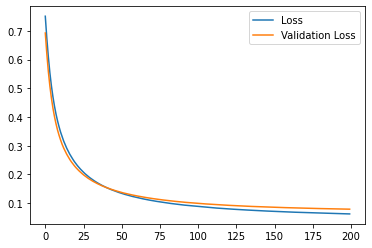

In [15]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'], label ='Loss')
plt.plot(results.history['val_loss'], label ='Validation Loss')
plt.legend()

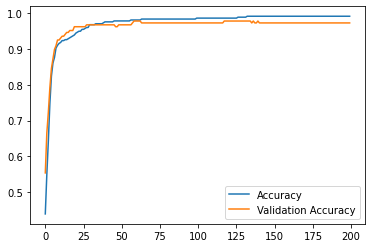

In [16]:
plt.plot(results.history['accuracy'], label ='Accuracy')
plt.plot(results.history['val_accuracy'], label ='Validation Accuracy')
plt.legend()

# Regressions


In [17]:
import numpy as np

!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-06-18 06:22:55--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-06-18 06:22:55 (37.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [19]:
import pandas as pd
data = pd.read_csv('moore.csv', header = None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

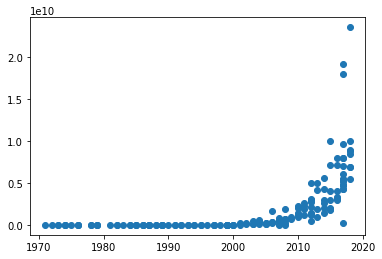

In [20]:
plt.scatter(X,Y)

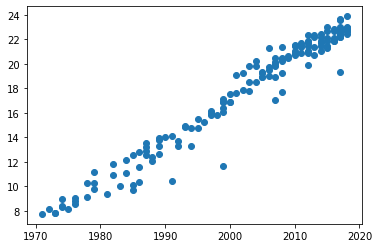

In [21]:
Y = np.log(Y)
plt.scatter(X, Y)

In [38]:
X = X - X.mean()

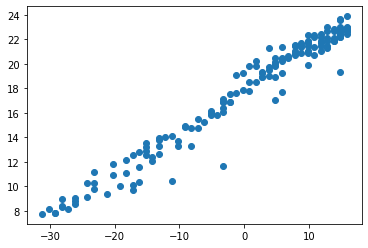

In [39]:
plt.scatter(X, Y)

In [52]:
model_re = tf.keras.models.Sequential(([
        tf.keras.layers.Input(shape= (1,)),
        tf.keras.layers.Dense(1)
        ]))

model_re.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9),
              loss = 'mse'
              )

In [53]:
results = model_re.fit(X, Y, epochs = 200)
print('Train score: ', model_re.evaluate(X,Y))

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 362.3442
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 309.1300
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 242.3182
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 215.6221
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 179.8644
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 197.8525
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 177.6017
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 189.2143
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 163.3698
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 70.0752
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 40.7324
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 29.3066
Epoch 13/200
6/6 [======================

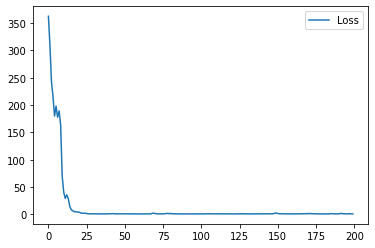

In [54]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'], label ='Loss')
plt.legend()

In [55]:
a = model_re.layers[0].get_weights()[0][0,0]
print(a)

0.30316895


In [56]:
print('Time to double: ', np.log(2)/a)

Time to double:  2.286339596861707


## Saving Models


In [57]:
model.save('linear_clasifier.h5')
!ls -lh

total 28K
-rw-r--r-- 1 root root  19K Jun 18 07:00 linear_clasifier.h5
-rw-r--r-- 1 root root 2.3K Jun 18 06:22 moore.csv
drwxr-xr-x 1 root root 4.0K Jun 10 16:28 sample_data
